# Decision Tree
Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform
both classification and regression tasks, and even multioutput tasks

## Training and Visualizing a Decision Tree

In [45]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [46]:
iris = load_iris()

In [47]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [48]:
x = iris['data']
y = iris['target']

In [49]:
X_train , X_test ,y_train , y_test = train_test_split(
                                             x,y 
                                            ,test_size=0.2
                                            ,random_state=42)

In [50]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [51]:
y_pred = tree_clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_pred , y_test)

0.9666666666666667

## Optimize max_depth

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_distributions = {
    'max_depth':uniform(1, 10)
    }
rnd_search_cv = RandomizedSearchCV(DecisionTreeClassifier(),param_distributions ,
                                  n_iter= 100
                                  ,verbose = 2
                                  ,random_state = 42)
rnd_search_cv.fit(X_train , y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] max_depth=4.745401188473625 .....................................
[CV] ...................... max_depth=4.745401188473625, total=   0.0s
[CV] max_depth=4.745401188473625 .....................................
[CV] ...................... max_depth=4.745401188473625, total=   0.0s
[CV] max_depth=4.745401188473625 .....................................
[CV] ...................... max_depth=4.745401188473625, total=   0.0s
[CV] max_depth=4.745401188473625 .....................................
[CV] ...................... max_depth=4.745401188473625, total=   0.0s
[CV] max_depth=4.745401188473625 .....................................
[CV] ...................... max_depth=4.745401188473625, total=   0.0s
[CV] max_depth=10.50714306409916 .....................................
[CV] ...................... max_depth=10.50714306409916, total=   0.0s
[CV] max_depth=10.50714306409916 .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... max_depth=6.142344384136116, total=   0.0s
[CV] max_depth=6.142344384136116 .....................................
[CV] ...................... max_depth=6.142344384136116, total=   0.0s
[CV] max_depth=6.924145688620425 .....................................
[CV] ...................... max_depth=6.924145688620425, total=   0.0s
[CV] max_depth=6.924145688620425 .....................................
[CV] ...................... max_depth=6.924145688620425, total=   0.0s
[CV] max_depth=6.924145688620425 .....................................
[CV] ...................... max_depth=6.924145688620425, total=   0.0s
[CV] max_depth=6.924145688620425 .....................................
[CV] ...................... max_depth=6.924145688620425, total=   0.0s
[CV] max_depth=6.924145688620425 .....................................
[CV] ...................... max_depth=6.924145688620425, total=   0.0s
[CV] max_depth=1.4645041271999772 ....................................
[CV] .

[CV] ...................... max_depth=1.884925020519195, total=   0.0s
[CV] max_depth=2.959828624191452 .....................................
[CV] ...................... max_depth=2.959828624191452, total=   0.0s
[CV] max_depth=2.959828624191452 .....................................
[CV] ...................... max_depth=2.959828624191452, total=   0.0s
[CV] max_depth=2.959828624191452 .....................................
[CV] ...................... max_depth=2.959828624191452, total=   0.0s
[CV] max_depth=2.959828624191452 .....................................
[CV] ...................... max_depth=2.959828624191452, total=   0.0s
[CV] max_depth=2.959828624191452 .....................................
[CV] ...................... max_depth=2.959828624191452, total=   0.0s
[CV] max_depth=1.4522728891053807 ....................................
[CV] ..................... max_depth=1.4522728891053807, total=   0.0s
[CV] max_depth=1.4522728891053807 ....................................
[CV] .

[CV] ..................... max_depth=7.3755747135521315, total=   0.0s
[CV] max_depth=7.3755747135521315 ....................................
[CV] ..................... max_depth=7.3755747135521315, total=   0.0s
[CV] max_depth=9.872127425763265 .....................................
[CV] ...................... max_depth=9.872127425763265, total=   0.0s
[CV] max_depth=9.872127425763265 .....................................
[CV] ...................... max_depth=9.872127425763265, total=   0.0s
[CV] max_depth=9.872127425763265 .....................................
[CV] ...................... max_depth=9.872127425763265, total=   0.0s
[CV] max_depth=9.872127425763265 .....................................
[CV] ...................... max_depth=9.872127425763265, total=   0.0s
[CV] max_depth=9.872127425763265 .....................................
[CV] ...................... max_depth=9.872127425763265, total=   0.0s
[CV] max_depth=5.722149251619493 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023D70C30670>},
                   random_state=42, verbose=2)

In [57]:
rnd_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=7.011150117432088)

In [58]:
tree_clf = DecisionTreeClassifier(max_depth=7)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [59]:
y_pred_opt = tree_clf.predict(X_test)

In [60]:
accuracy_score (y_pred_opt, y_test)

1.0

In [134]:
from matplotlib import pyplot as plt
from sklearn import tree

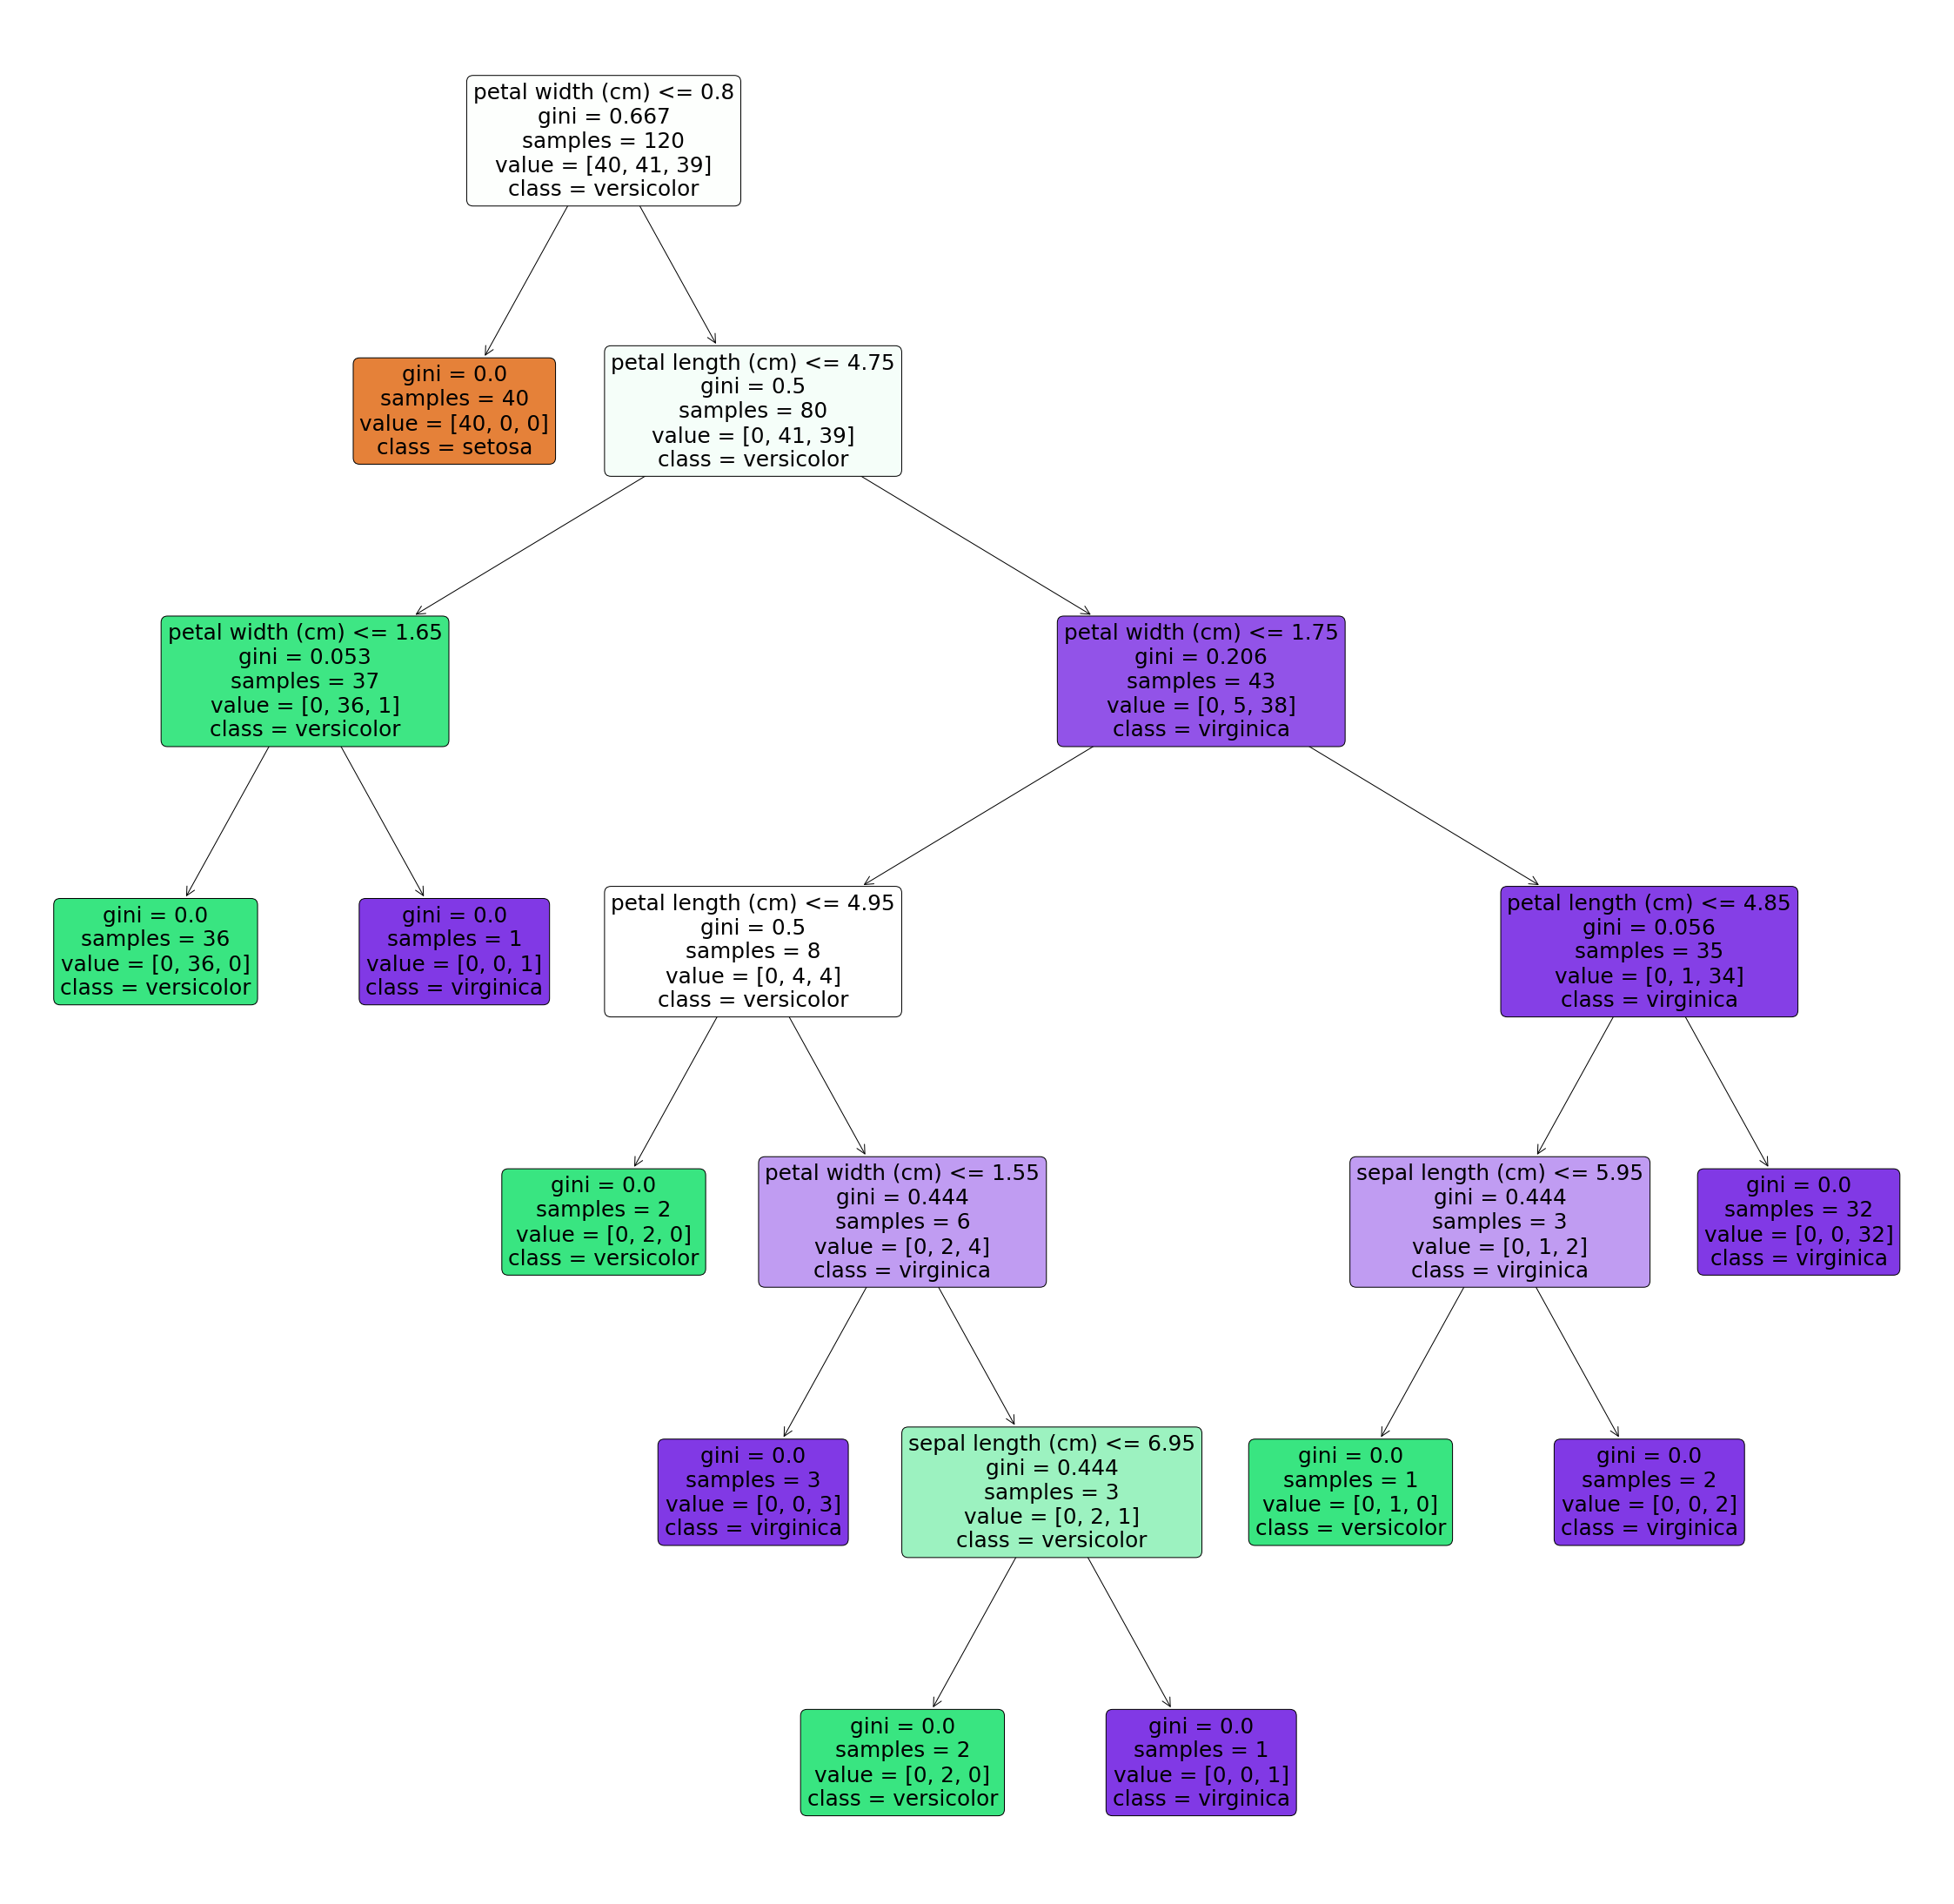

In [142]:
fig = plt.figure(figsize=(40,40))
_=tree.plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   rounded=True,
                   filled=True)

## Note
One of the many qualities of Decision Trees is that they require
very little data preparation. In fact, they don’t require feature scaling
or centering at all.

## Note 
Scikit-Learn uses the CART algorithm, which produces only binary
trees: nonleaf nodes always have two children (i.e., questions only
have yes/no answers). However, other algorithms such as ID3 can
produce Decision Trees with nodes that have more than two
children.

## Model Interpretation: White Box Versus Black Box
Decision Trees are intuitive, and their decisions are easy to interpret. Such models are
often called white box models. In contrast, as we will see, Random Forests or neural
networks are generally considered black box models. They make great predictions,
and you can easily check the calculations that they performed to make these predictions;
nevertheless, it is usually hard to explain in simple terms why the predictions
were made. For example, if a neural network says that a particular person appears on
a picture, it is hard to know what contributed to this prediction: did the model recognize
that person’s eyes? Their mouth? Their nose? Their shoes? Or even the couch
that they were sitting on? Conversely, Decision Trees provide nice, simple classification
rules that can even be applied manually if need be (e.g., for flower classification).

# Estimating Class Probabilities

In [157]:
tree_clf.predict_proba ([X_test[1]])

array([[1., 0., 0.]])

In [158]:
tree_clf.predict ([X_test[1]])

array([0])

## Note
CART algorithm is a greedy algorithm: it greedily
searches for an optimum split at the top level, then repeats the
process at each subsequent level. It does not check whether or not
the split will lead to the lowest possible impurity several levels
down. A greedy algorithm often produces a solution that’s reasonably
good but not guaranteed to be optimal.
Unfortunately, finding the optimal tree is known to be an NPComplete
problem:2 it requires O(exp(m)) time, making the problem
intractable even for small training sets. This is why we must
settle for a “reasonably good” solution

## Regularization Hyperparameters
To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom
during training. As you know by now, this is called regularization.The regularization
hyperparameters depend on the algorithm used, but generally you can at least restrict
the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the
max_depth hyperparameter (the default value is None, which means unlimited).
Reducing max_depth will regularize the model and thus reduce the risk of overfitting

# Regression
Decision Trees are also capable of performing regression tasks. Let’s build a regression
tree using Scikit-Learn’s DecisionTreeRegressor class,

In [174]:
x = 2 * np.random.rand(1000,1)
y = 4 + 3 * x +x**x*3 + np.random.randn(1000,1)

X_train, X_val, y_train, y_val = train_test_split(x, y, 
                                                  test_size=0.2,
                                                  random_state = 42)

In [199]:
from sklearn.tree import DecisionTreeRegressor

In [259]:
param_distributions = {
    'max_depth':uniform(1, 10),
    'max_leaf_nodes': list(range(2, 50)), 
    'min_samples_split': [2, 3, 4]
    }

rnd_search_cv = RandomizedSearchCV(DecisionTreeRegressor(),param_distributions ,
                                  n_iter= 100
                                  ,verbose = 1
                                  ,cv=3
                                  ,random_state = 42)
rnd_search_cv.fit(X_train , y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023D759140A0>,
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...],
                                        'min_samples_split': [2, 3, 4]},
                   random_state=42, verbose=1)

In [260]:
rnd_search_cv.best_estimator_

DecisionTreeRegressor(max_depth=4.745401188473625, max_leaf_nodes=30,
                      min_samples_split=4)

In [261]:
tree_reg = DecisionTreeRegressor(max_depth=5,max_leaf_nodes=30, min_samples_split=4)

In [262]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=30, min_samples_split=4)

In [263]:
y_pred = tree_reg.predict(X_val)

In [264]:
y_pred[1],y_val[1] 

(7.131942581212746, array([8.12143639]))

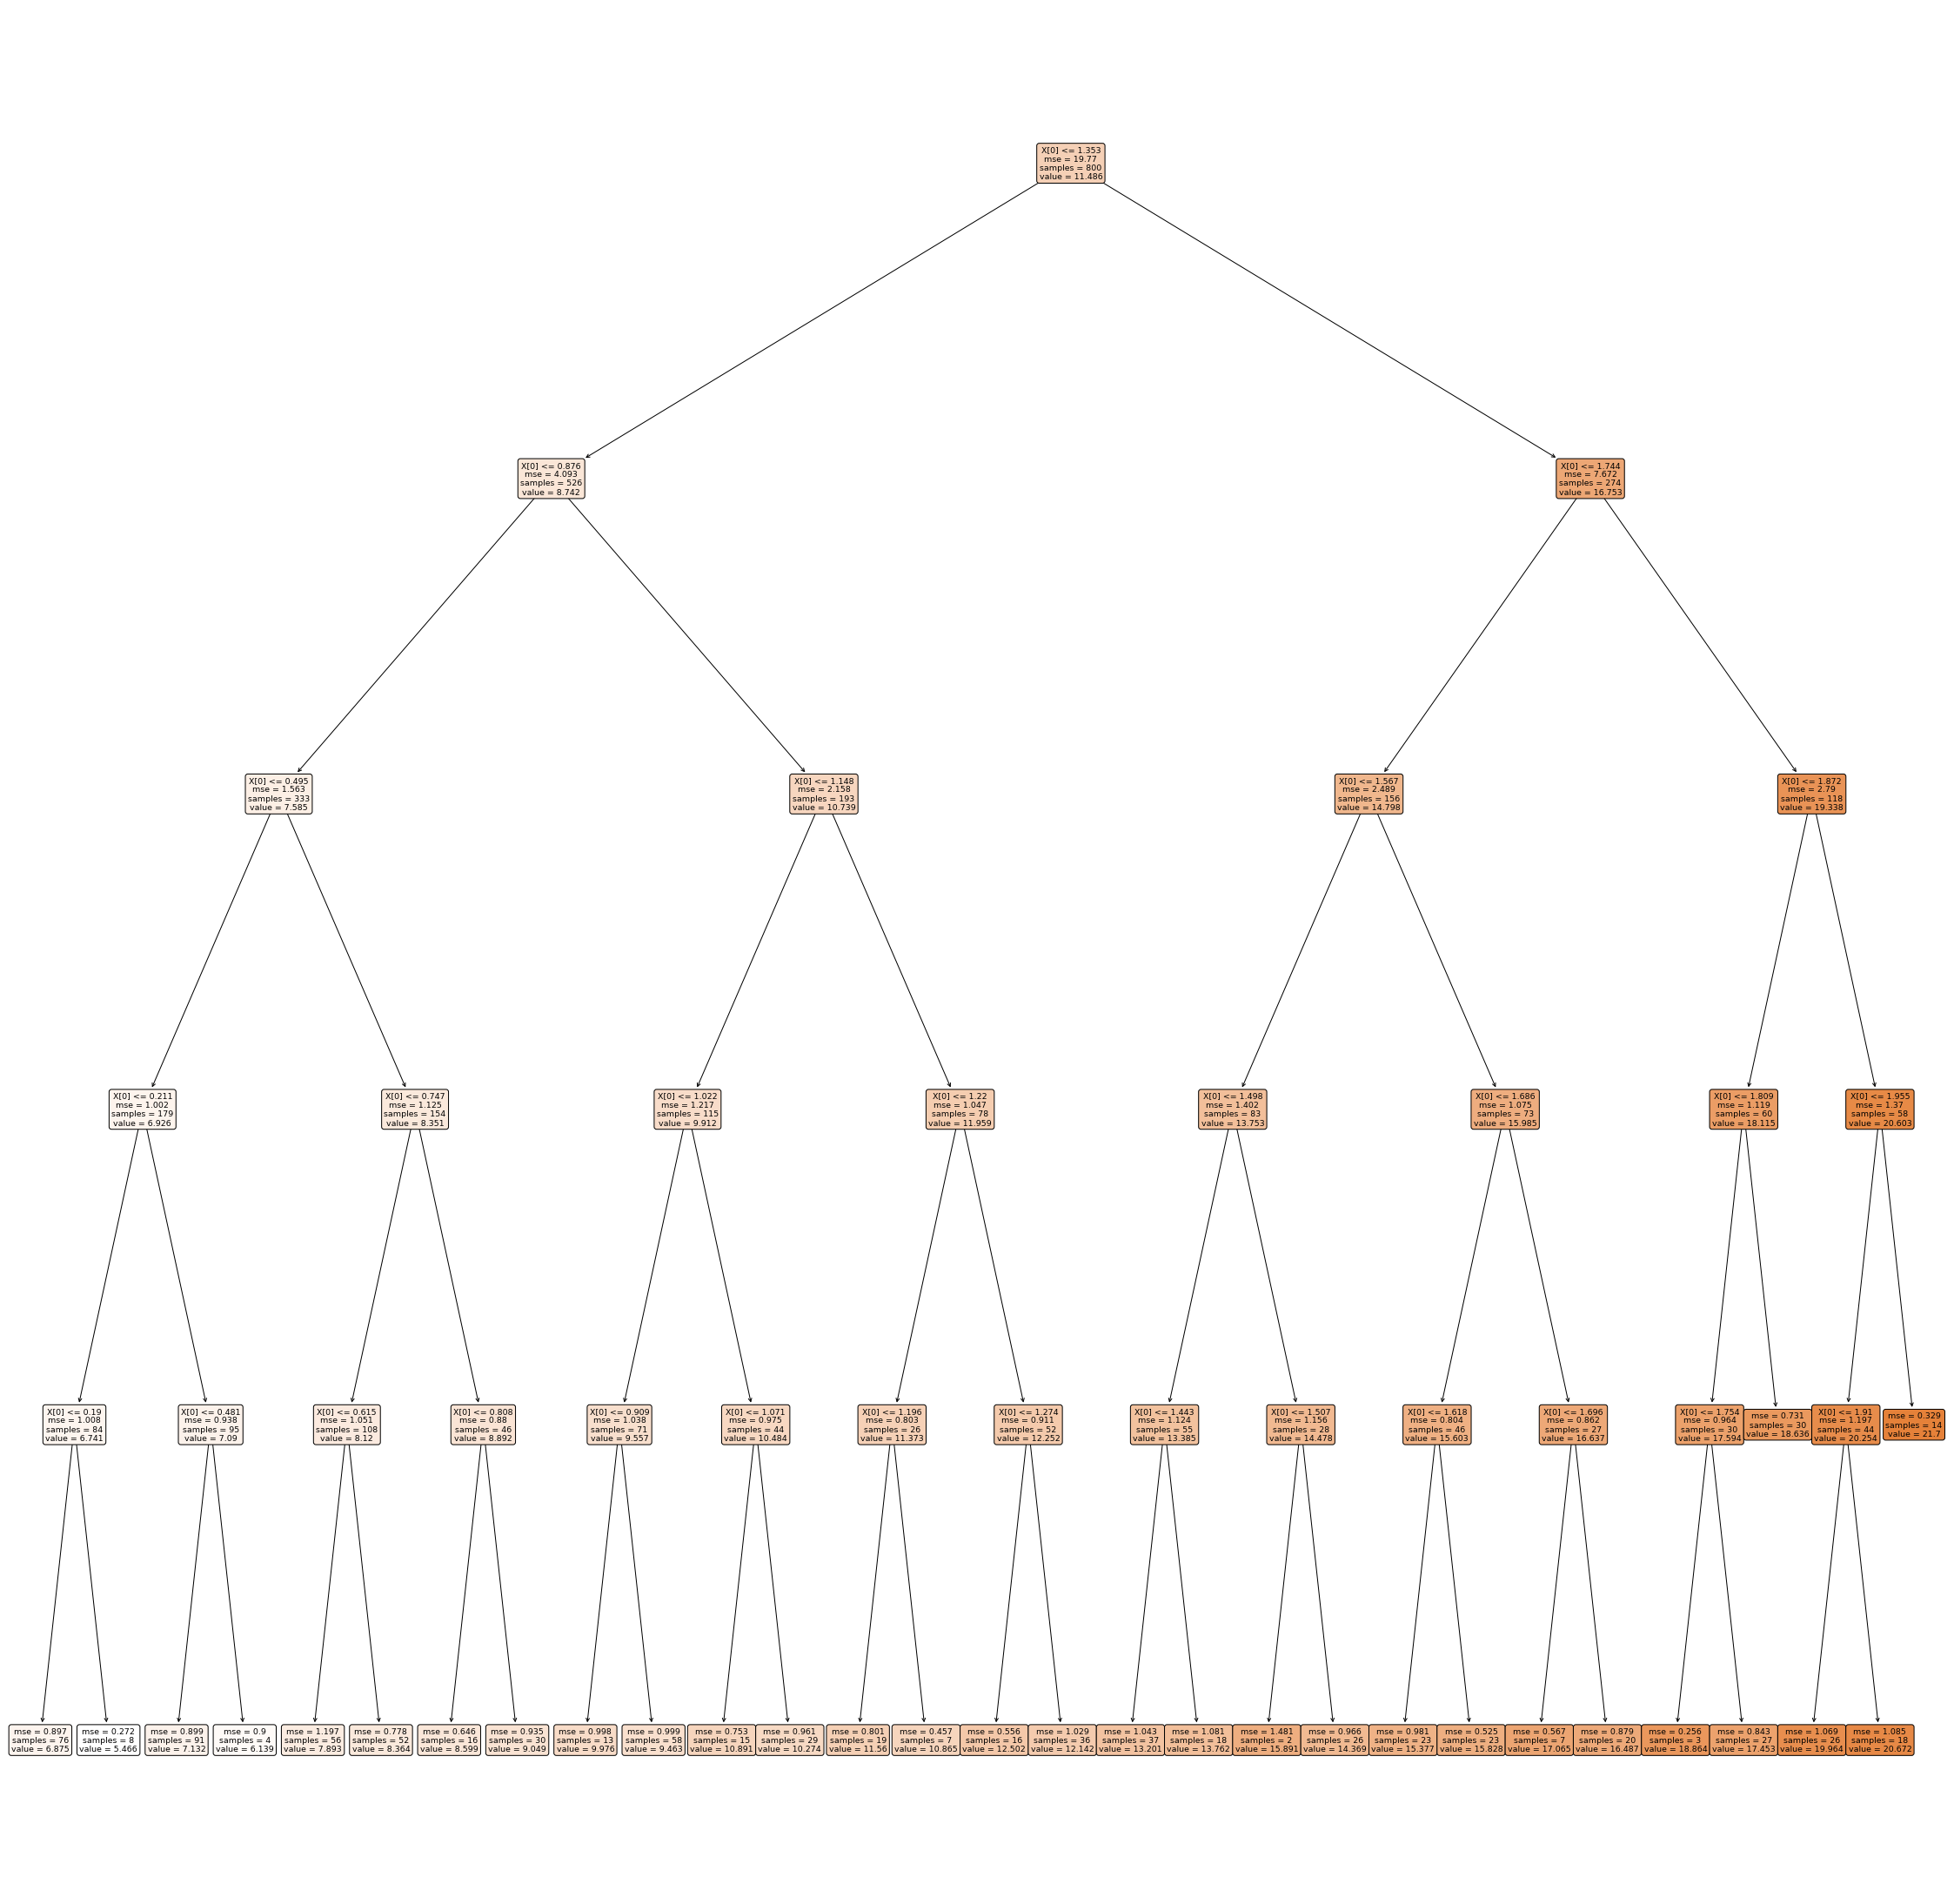

In [265]:
fig = plt.figure(figsize=(40,40))
_=tree.plot_tree(tree_reg, 
                   rounded=True,
                   filled=True)